In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/clean_house_data.csv")


In [3]:
cluster_features = [
    'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront',
    'view', 'condition'
]

X = df[cluster_features]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


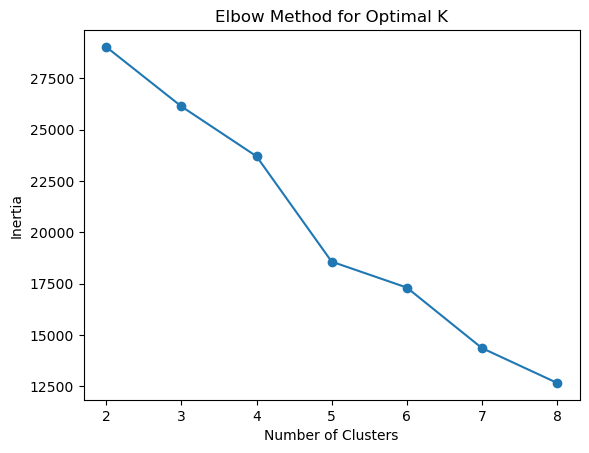

In [5]:
inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,9), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [7]:
df['cluster'].value_counts()


cluster
2    1916
1    1368
3    1241
0      75
Name: count, dtype: int64

In [8]:
cluster_summary = df.groupby('cluster')[cluster_features + ['price']].mean()
cluster_summary


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,price
cluster,,,,,,,,,
0,3.680000,2.676667,3283.466667,238852.760000,1.680000,0.000000,0.560000,3.320000,700929.395556
1,3.231725,1.802266,1783.489766,11197.024123,1.160819,0.004386,0.183480,4.285819,487916.306261
2,3.871608,2.755611,2771.065762,12180.995303,1.944415,0.013570,0.374739,3.168058,691333.301800
3,2.843674,1.606567,1487.155520,9469.219178,1.221595,0.000806,0.077357,2.978243,398385.116113


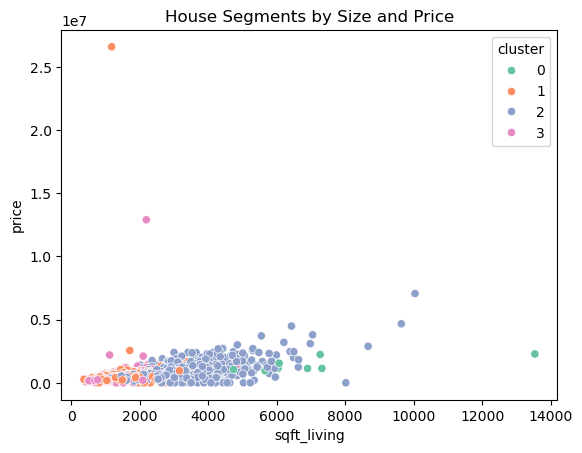

In [9]:
sns.scatterplot(
    x='sqft_living',
    y='price',
    hue='cluster',
    data=df,
    palette='Set2'
)
plt.title("House Segments by Size and Price")
plt.show()


In [10]:
df.to_csv("../data/processed/clustered_house_data.csv", index=False)
